In [8]:
import re
import pandas as pd 
from nltk.corpus import stopwords

In [9]:
data = pd.DataFrame(pd.read_csv("C:/Users/lenovo/Desktop/ML/datasets/sentimentanalysis.tsv", sep='\t'))
x, comments = 0, []

In [10]:
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

ps = PorterStemmer()
cv = CountVectorizer(max_features = 2500)

In [11]:
while x < 1000:
    comment = re.sub("[^a-zA-Z]"," ",data["Review"][x]).lower().split()
    comment = [ps.stem(word) for word in comment if not word in set(stopwords.words("english"))]
    comment = ' '.join(comment)
    comments.append(comment)
    x += 1

x = cv.fit_transform(comments).toarray()
y = data.iloc[:,1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 17)

In [12]:
from xgboost import XGBClassifier
XGB = XGBClassifier()

from sklearn.preprocessing import StandardScaler
SCALER = StandardScaler()

x_train = SCALER.fit_transform(x_train)
x_test = SCALER.transform(x_test)

In [13]:
def classify(MODEL, TITLE):

    MODEL.fit(x_train, y_train)
    y_predicted = MODEL.predict(x_test)

    import matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix

    ACC = round(accuracy_score(y_test, y_predicted)*100,3)
    CM = confusion_matrix(y_test, y_predicted)

    TP = CM[0][0]
    TN = CM[1][1]
    FP = CM[0][1]
    FN = CM[1][0]
    TP_RATE = round(TP/(TP + FN)*100,3)
    FP_RATE = round(FP/(FP + TN)*100,3)
    PRECISION = round(TP/(TP + FN)*100,3)
    RECALL = round(TP/(TP + FP)*100,3)
    F1 = round(2*((PRECISION*RECALL)/(PRECISION+RECALL)),3)

    from sklearn.model_selection import cross_val_score
    CVALIDATION = round(cross_val_score(estimator = MODEL, X = x_train, y = y_train, cv = 5).mean()*100,3)

    plot_confusion_matrix(MODEL, x_test, y_test)
    plt.title(f'{TITLE}\nCross Validation: %{CVALIDATION}\nTrue Positive Rate: %{TP_RATE} | False Positive Rate: %{FP_RATE}\nAccuracy: %{ACC} | Precision: %{RECALL} | Recall: %{PRECISION} | F1 Score: %{F1}')
    plt.show()

c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:16:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:16:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:16:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:16:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:16:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:16:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


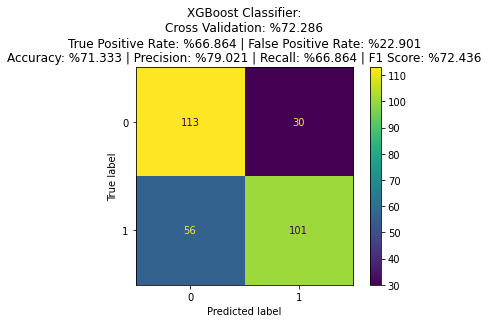

In [14]:
classify(XGB, 'XGBoost Classifier:')